In [ ]:
import pandas as pd
import time
import datetime
import os
import sys
import glob
import shutil


corridor_file = "/content/drive/MyDrive/CIS 545 Project Folder/Data Set/pems_district4_corridors.xlsx"
travel_time_file = '/content/drive/MyDrive/CIS 545 Project Folder/Data Set/district4_travel_time.csv'

corridor_df = pd.read_excel(corridor_file)
travel_time_df = pd.read_csv(travel_time_file)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def cal_speed(corridor_df, record):

    Length = corridor_df[(corridor_df['Corridor'] == record["corridor_name"]) & (corridor_df['Fwy-Dir'] == record["direction"])][['Length']]
    print(Length)
    time = record["Mainline Agg"]/60
    speed = round(Length/time,3)
    print(speed)
    return speed

# travel_time_df['Mainline Speed'] = travel_time_df.apply(lambda row: cal_speed(corridor_df, row), axis = 1)

print(cal_speed(corridor_df, travel_time_df.iloc[18000]))

In [ ]:
travel_time_df.head(10)

,corridor_id,corridor_name,direction,5 Minutes,Mainline Agg,Mainline Speed
0,4666,13: Alameda I-80,I80-E,2017-08-01 00:00:00,17.63,68.746
1,4666,13: Alameda I-80,I80-E,2017-08-01 00:05:00,17.70,68.475
2,4666,13: Alameda I-80,I80-E,2017-08-01 00:10:00,17.48,69.336
3,4666,13: Alameda I-80,I80-E,2017-08-01 00:15:00,17.45,69.456
4,4666,13: Alameda I-80,I80-E,2017-08-01 00:20:00,17.75,68.282
5,4666,13: Alameda I-80,I80-E,2017-08-01 00:25:00,17.78,68.166
6,4666,13: Alameda I-80,I80-E,2017-08-01 00:30:00,17.98,67.408
7,4666,13: Alameda I-80,I80-E,2017-08-01 00:35:00,17.93,67.596
8,4666,13: Alameda I-80,I80-E,2017-08-01 00:40:00,18.10,66.961
9,4666,13: Alameda I-80,I80-E,2017-08-01 00:45:00,18.18,66.667


In [ ]:
corridor_df.head(10)

,District,Corridor,Fwy-Dir,From CA PM,To CA PM,Length,HOV/HOT,Mainline,Difference,HOV/HOT %
0,4,01: 880-980-24,I880-N,31.525,R31.803,12.5,NaN,12.0,-12,0.0
1,4,01: 880-980-24,SR24-W,R6.152,R1.847,12.5,NaN,12.0,-12,0.0
2,4,01a: 880-980-24-13,SR13-N,T9.762,5.262,4.5,NaN,4.0,-4,0.0
3,4,01a: 880-980-24-13,SR13-S,4.262,9.012,4.8,NaN,4.0,-4,0.0
4,4,02: I-580,I580-E,5.758,47.795,6.0,NaN,6.0,-6,0.0
5,4,02: I-580,I580-W,47.865,5.828,6.0,NaN,6.0,-6,0.0
6,4,02: I-80,I80-E,3.82,0.234,4.5,6.0,5.0,1,120.0
7,4,02: I-80,I80-W,0.234,3.82,4.5,6.0,6.0,0,100.0
8,4,03: I-880,I880-N,13.021,20.653,7.6,9.0,9.0,0,100.0
9,4,03: I-880,I880-S,20.653,13.021,7.6,9.0,9.0,0,100.0


In [ ]:
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/CIS 545 Project Folder/Data Set/bay_sensor_locations.csv')

In [ ]:
df.dtypes

id       int64
lat    float64
lon    float64
dtype: object

In [ ]:
!pip install geopandas

     |████████████████████████████████| 1.0 MB 4.3 MB/s 
     |████████████████████████████████| 15.4 MB 35.7 MB/s 
     |████████████████████████████████| 6.3 MB 32.8 MB/s 


In [ ]:
!pip install chart-studio

     |████████████████████████████████| 64 kB 1.8 MB/s 


In [ ]:
import chart_studio.plotly as py
import chart_studio.tools as tl
import plotly.graph_objs as go
import pandas as pd

# Change API key for Plotly 

tl.set_credentials_file(username='aschrock', api_key='CWwy1WgujKrPK4Z1J0Oh')

# Add Mapbox access token here 

mapbox_access_token = 'pk.eyJ1IjoiYXNjaHJvY2siLCJhIjoiY2p2NnRoeHc2MDkxbTQ0bnR6aTVwZDNsaCJ9.MA76hkxD3rOGgnVCDBVC9w'

# Save latitude and longitude as variables. In this dataset, the X column is longitude and the Y column is latitude. 

site_lat = df.lat
site_lon = df.lon
locations_name = df.id.to_string()

# Generate the data for the map 

data = [
    go.Scattermapbox(
        lat=site_lat,
        lon=site_lon,
        mode='markers',
        marker=dict(
            size=3,
            color='rgb(255, 0, 0)',
            opacity=1
        ),
        text=locations_name,
        hoverinfo='text'
    ),
    go.Scattermapbox(
        lat=site_lat,
        lon=site_lon,
        mode='markers',
        marker=dict(
            size=8,
            color='rgb(242, 177, 172)',
            opacity=0.8
        ),
        hoverinfo='none'
    )]


# Generate a layout around Los Angeles, zoomed in so we can see the data points 

layout = go.Layout(
    title='District 4 Traffic Sensors Locations',
    autosize=True,
    hovermode='closest',
    showlegend=False,
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=37.3382082,
            lon=-121.8863286
        ),
        pitch=0,
        zoom=10,
        style='light'
    ),
)
	
# Generate the figure using the iplot function 
  
fig = dict(data=data, layout=layout)
py.iplot(fig, filename='District 4 Traffic Sensors')

In [ ]:
!apt install cuda

Reading package lists... Done
Building dependency tree       
Reading state information... Done
cuda is already the newest version (11.5.1-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [ ]:
!pip install mxnet-cu101 numpy pandas matplotlib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import mxnet
import mxnet.gluon as G

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
travel_time_df = pd.read_csv('/content/drive/MyDrive/2021_travel_time.csv')
corridor_file = "/content/drive/MyDrive/Data Set/pems_district4_corridors.xlsx"
corridor_df = pd.read_excel(corridor_file)

travel_time_df = travel_time_df[travel_time_df['5 Minutes'] >= '2021-10-01 00:00:00']

In [ ]:
corridors_to_merge = []

for row_num, corridor in corridor_df.iterrows():  	
      if row_num == 0:
          all_corridors_tt_2021 = travel_time_df[(travel_time_df['corridor_name'] == corridor["Corridor"])	&  (travel_time_df['direction'] == corridor["Fwy-Dir"])][["5 Minutes",	"Mainline Agg"]]
      else:
          corridor_tt_2021 = travel_time_df[(travel_time_df['corridor_name'] == corridor["Corridor"])	&  (travel_time_df['direction'] == corridor["Fwy-Dir"])][["5 Minutes",	"Mainline Agg"]]
          all_corridors_tt_2021 = all_corridors_tt_2021.merge(corridor_tt_2021, "outer", left_on='5 Minutes', right_on='5 Minutes')

In [ ]:
all_corridors_tt_2021 = all_corridors_tt_2021.dropna(axis=1)

In [ ]:
new_columns = [f"travel_time_{n}" for n in range(len(all_corridors_tt_2021.columns) - 1)]
new_columns.insert(0, "timestamp")
# len(new_columns)
all_corridors_tt_2021 = all_corridors_tt_2021.set_axis(new_columns, axis=1, inplace=False)
all_corridors_tt_2021

,timestamp,travel_time_0,travel_time_1,travel_time_2,travel_time_3,travel_time_4,travel_time_5,travel_time_6,travel_time_7,travel_time_8,travel_time_9,travel_time_10,travel_time_11,travel_time_12,travel_time_13,travel_time_14,travel_time_15,travel_time_16,travel_time_17,travel_time_18,travel_time_19,travel_time_20,travel_time_21,travel_time_22,travel_time_23,travel_time_24,travel_time_25,travel_time_26,travel_time_27,travel_time_28,travel_time_29,travel_time_30,travel_time_31,travel_time_32,travel_time_33,travel_time_34,travel_time_35,travel_time_36,travel_time_37,travel_time_38,travel_time_39,travel_time_40
0,2021-10-01 00:05:00,10.90,11.58,5.32,10.62,4.15,4.23,1.28,1.25,13.38,13.05,6.47,6.08,4.22,4.63,3.57,3.57,27.75,11.93,11.98,12.02,7.62,17.98,14.83,3.22,3.30,12.43,12.33,8.28,8.20,17.13,12.17,13.92,13.93,18.33,18.78,25.48,25.58,5.75,6.08,15.7,15.80
1,2021-10-01 00:05:00,10.90,11.58,5.32,10.62,4.15,4.23,1.28,1.25,13.38,13.05,6.47,6.08,4.22,4.63,3.57,3.57,27.75,11.93,11.98,12.02,7.62,17.98,14.83,3.22,3.30,12.43,12.33,8.28,8.20,17.13,12.17,13.92,13.93,18.33,18.78,25.48,25.58,5.75,6.08,15.7,15.80
2,2021-10-01 00:05:00,10.90,11.58,5.32,10.62,4.15,4.23,1.28,1.25,13.38,13.05,6.47,6.08,4.22,4.63,3.57,3.57,27.75,11.93,11.98,12.02,7.62,17.98,14.83,3.22,3.30,12.43,12.33,8.28,8.20,17.13,12.17,13.92,13.93,18.33,18.78,25.48,25.58,5.75,6.08,15.7,15.80
3,2021-10-01 00:05:00,10.90,11.58,5.32,10.62,4.15,4.23,1.28,1.25,13.38,13.05,6.47,6.08,4.22,4.63,3.57,3.57,27.75,11.93,11.98,12.02,7.62,17.98,14.83,3.22,3.30,12.43,12.33,8.28,8.20,17.13,12.17,13.92,13.93,18.33,18.78,25.48,25.58,5.75,6.08,15.7,15.80
4,2021-10-01 00:05:00,10.90,11.58,5.42,10.62,4.15,4.23,1.28,1.25,13.38,13.05,6.47,6.08,4.22,4.63,3.57,3.57,27.75,11.93,11.98,12.02,7.62,17.98,14.83,3.22,3.30,12.43,12.33,8.28,8.20,17.13,12.17,13.92,13.93,18.33,18.78,25.48,25.58,5.75,6.08,15.7,15.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55859,2021-10-31 23:55:00,10.88,11.60,5.33,10.78,4.12,4.08,1.25,1.32,12.98,14.45,6.17,7.58,4.12,4.25,3.57,3.52,27.42,11.87,11.78,12.05,7.77,17.98,15.05,3.30,3.25,12.42,12.20,8.03,8.15,17.18,12.40,13.95,13.97,18.42,18.82,25.70,25.53,5.73,5.92,15.7,15.72
55860,2021-10-31 23:55:00,10.88,11.60,5.33,10.78,4.12,4.08,1.25,1.32,12.98,14.45,6.17,7.58,4.12,4.25,3.57,3.52,27.42,11.87,11.78,12.05,7.77,17.98,15.05,3.30,3.25,12.42,12.20,8.03,8.15,17.18,12.40,13.95,13.97,18.42,18.82,25.70,25.53,5.73,5.92,15.7,15.72
55861,2021-10-31 23:55:00,10.88,11.60,5.33,10.78,4.12,4.08,1.25,1.32,12.98,14.45,6.17,7.58,4.12,4.25,3.57,3.52,27.42,11.87,11.78,12.05,7.77,17.98,15.05,3.30,3.25,12.42,12.20,8.03,8.15,17.18,12.40,13.95,13.97,18.42,18.82,25.70,25.53,5.73,5.92,15.7,15.72
55862,2021-10-31 23:55:00,10.88,11.60,5.33,10.78,4.12,4.08,1.25,1.32,12.98,14.45,6.17,7.58,4.12,4.25,3.57,3.52,27.42,11.87,11.78,12.05,7.77,17.98,15.05,3.30,3.25,12.42,12.20,8.03,8.15,17.18,12.40,13.95,13.97,18.42,18.82,25.70,25.53,5.73,5.92,15.7,15.72


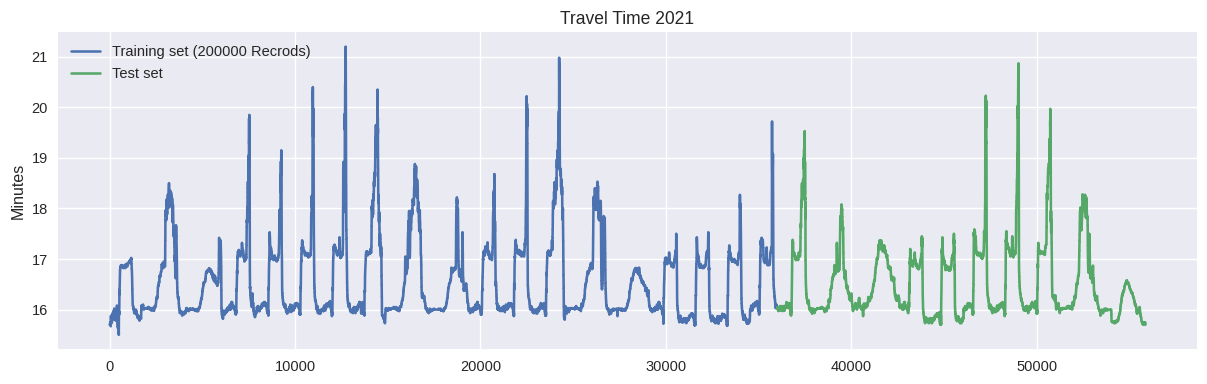

In [ ]:
num_training = 1500*24

plt.figure(dpi=105,figsize=(14,4))
all_corridors_tt_2021["travel_time_39"].iloc[:num_training].plot(legend=True)
all_corridors_tt_2021["travel_time_39"].iloc[num_training:].plot(legend=True)
plt.legend(['Training set (200000 Recrods)','Test set'])
plt.title('Travel Time 2021')
plt.ylabel("Minutes")
plt.show()

In [ ]:
def make_dataset_many_to_one(array,time_steps):

    x = []
    y = []

    for i in range(time_steps,len(array)):
        x.append(array[i-time_steps:i])
        y.append(array[i][-1])
        
    return np.array(x), np.array(y)

In [ ]:
train_data = all_corridors_tt_2021.drop(['timestamp'], axis=1).iloc[:num_training]
total_data = all_corridors_tt_2021.drop(['timestamp'], axis=1)
 #for testing at bottom
train_data


,travel_time_0,travel_time_1,travel_time_2,travel_time_3,travel_time_4,travel_time_5,travel_time_6,travel_time_7,travel_time_8,travel_time_9,travel_time_10,travel_time_11,travel_time_12,travel_time_13,travel_time_14,travel_time_15,travel_time_16,travel_time_17,travel_time_18,travel_time_19,travel_time_20,travel_time_21,travel_time_22,travel_time_23,travel_time_24,travel_time_25,travel_time_26,travel_time_27,travel_time_28,travel_time_29,travel_time_30,travel_time_31,travel_time_32,travel_time_33,travel_time_34,travel_time_35,travel_time_36,travel_time_37,travel_time_38,travel_time_39,travel_time_40
0,10.90,11.58,5.32,10.62,4.15,4.23,1.28,1.25,13.38,13.05,6.47,6.08,4.22,4.63,3.57,3.57,27.75,11.93,11.98,12.02,7.62,17.98,14.83,3.22,3.3,12.43,12.33,8.28,8.2,17.13,12.17,13.92,13.93,18.33,18.78,25.48,25.58,5.75,6.08,15.70,15.80
1,10.90,11.58,5.32,10.62,4.15,4.23,1.28,1.25,13.38,13.05,6.47,6.08,4.22,4.63,3.57,3.57,27.75,11.93,11.98,12.02,7.62,17.98,14.83,3.22,3.3,12.43,12.33,8.28,8.2,17.13,12.17,13.92,13.93,18.33,18.78,25.48,25.58,5.75,6.08,15.70,15.80
2,10.90,11.58,5.32,10.62,4.15,4.23,1.28,1.25,13.38,13.05,6.47,6.08,4.22,4.63,3.57,3.57,27.75,11.93,11.98,12.02,7.62,17.98,14.83,3.22,3.3,12.43,12.33,8.28,8.2,17.13,12.17,13.92,13.93,18.33,18.78,25.48,25.58,5.75,6.08,15.70,15.80
3,10.90,11.58,5.32,10.62,4.15,4.23,1.28,1.25,13.38,13.05,6.47,6.08,4.22,4.63,3.57,3.57,27.75,11.93,11.98,12.02,7.62,17.98,14.83,3.22,3.3,12.43,12.33,8.28,8.2,17.13,12.17,13.92,13.93,18.33,18.78,25.48,25.58,5.75,6.08,15.70,15.80
4,10.90,11.58,5.42,10.62,4.15,4.23,1.28,1.25,13.38,13.05,6.47,6.08,4.22,4.63,3.57,3.57,27.75,11.93,11.98,12.02,7.62,17.98,14.83,3.22,3.3,12.43,12.33,8.28,8.2,17.13,12.17,13.92,13.93,18.33,18.78,25.48,25.58,5.75,6.08,15.70,15.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35995,11.07,11.60,5.42,10.97,4.13,4.10,1.27,1.35,13.28,13.63,6.27,6.60,4.27,4.28,3.57,3.52,27.35,12.08,11.83,12.08,7.63,17.80,15.17,3.30,3.3,12.47,12.22,8.28,8.3,17.32,12.40,14.03,14.13,18.42,18.90,25.67,25.93,5.73,5.87,16.03,15.98
35996,11.07,11.60,5.45,10.97,4.13,4.10,1.27,1.35,13.28,13.63,6.27,6.60,4.27,4.28,3.57,3.52,27.35,12.08,11.83,12.08,7.63,17.80,15.17,3.30,3.3,12.47,12.22,8.28,8.3,17.32,12.40,14.03,14.13,18.42,18.90,25.67,25.93,5.73,5.87,16.03,15.98
35997,11.07,11.60,5.45,10.97,4.13,4.10,1.27,1.35,13.28,13.63,6.27,6.60,4.27,4.28,3.57,3.52,27.35,12.08,11.83,12.08,7.63,17.80,15.17,3.30,3.3,12.47,12.22,8.28,8.3,17.32,12.40,14.03,14.13,18.42,18.90,25.67,25.93,5.73,5.87,16.03,15.98
35998,11.07,11.60,5.45,10.97,4.13,4.10,1.27,1.35,13.28,13.63,6.27,6.60,4.27,4.28,3.57,3.52,27.35,12.08,11.83,12.08,7.63,17.80,15.17,3.30,3.3,12.47,12.22,8.28,8.3,17.32,12.40,14.03,14.13,18.42,18.90,25.67,25.93,5.73,5.87,16.03,15.98


In [ ]:

#scale values to [0,1]
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit_transform(total)
train = scaler.transform(train)
total = scaler.transform(total)

trn_x,trn_y = make_dataset_many_to_one(train,24)  #every 2 hours.
total_x,total_y = make_dataset_many_to_one(total,24)  #every 2 hours.

trn_x = trn_x.reshape(-1,24, train.shape[1])

# select = random.randrange(1, len(trn_x), 5)

# trn_x = trn_x[select]
# trn_y = trn_y[select]

total_x = total_x.reshape(-1,24,total.shape[1])

In [ ]:
trn_x = mxnet.nd.array(trn_x)
trn_y = mxnet.nd.array(trn_y)

total_x = mxnet.nd.array(total_x)
total_y = mxnet.nd.array(total_y)

In [ ]:
class Net(G.Block):
    def __init__(self, **kwargs):
        super(Net, self).__init__(**kwargs)
        with self.name_scope():
            
            self.lstm = G.rnn.LSTM(120,3,dropout=0.2)
            self.out = G.nn.Dense(1)
            
    def forward(self,x):
        
        x = self.lstm(x)
        x = self.out(x)
        
        return x
    
Model = Net()
print(Model)

Net(
  (lstm): LSTM(None -> 120, TNC, num_layers=3, dropout=0.2)
  (out): Dense(None -> 1, linear)
)


In [ ]:
device = mxnet.gpu(0) if mxnet.context.num_gpus() > 0 else mxnet.cpu(0)
Model.initialize(mxnet.init.Xavier(), ctx=device)

In [ ]:
trainer = G.Trainer(
    params=Model.collect_params(),
    optimizer='adam',
    optimizer_params={'learning_rate': 0.001},
)

loss_function = G.loss.L2Loss()
mse = mxnet.metric.MSE()

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sat Dec 18 04:20:15 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    33W / 250W |   9079MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from mxnet import autograd

EPOCHS = 20

trn_loss = []

train_iter = mxnet.io.NDArrayIter(trn_x, trn_y, 50, shuffle=True)

for epoch in range(EPOCHS):
    
    for trn_batch in train_iter:

        x = trn_batch.data[0].as_in_context(device)
        y = trn_batch.label[0].as_in_context(device)
        
        with autograd.record():
            y_pred = Model(x)
            loss = loss_function(y_pred, y)
        
        #backprop
        loss.backward()
        
        #Optimize!
        trainer.step(batch_size=trn_x.shape[0])
        
    train_iter.reset()
    
    # Calculate train metrics
    
    predictions = Model(trn_x.as_in_context(device))
    mse.update(trn_y, predictions)
    trn_loss.append(mse.get()[1])
    mse.reset()
    
    train_iter.reset()
    
    print("epoch: {} | trn_loss: {:.8f}".format(epoch+1,
                                                trn_loss[-1]))

epoch: 1 | trn_loss: 0.00017180
epoch: 2 | trn_loss: 0.00005957
epoch: 3 | trn_loss: 0.00006597
epoch: 4 | trn_loss: 0.00004684
epoch: 5 | trn_loss: 0.00004829
epoch: 6 | trn_loss: 0.00003962
epoch: 7 | trn_loss: 0.00003479
epoch: 8 | trn_loss: 0.00004603
epoch: 9 | trn_loss: 0.00003096
epoch: 10 | trn_loss: 0.00004971
epoch: 11 | trn_loss: 0.00003760
epoch: 12 | trn_loss: 0.00003393
epoch: 13 | trn_loss: 0.00004300
epoch: 14 | trn_loss: 0.00004772
epoch: 15 | trn_loss: 0.00003285
epoch: 16 | trn_loss: 0.00003478
epoch: 17 | trn_loss: 0.00003723
epoch: 18 | trn_loss: 0.00002804
epoch: 19 | trn_loss: 0.00002405
epoch: 20 | trn_loss: 0.00002791


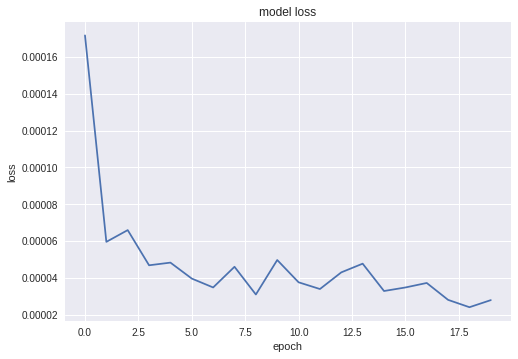

In [ ]:
import matplotlib.pyplot as plt

plt.plot(trn_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
pred = Model( total_x.as_in_context(device) )
predictions = []

for p in pred.asnumpy():
    predictions.append(p[0])


In [ ]:
pm_scaler = scaler.fit(total_data['travel_time_40'].values.reshape(-1, 1))
predicted = pm_scaler.inverse_transform(np.array(predictions).reshape(-1, 1) )    

infered = pd.DataFrame(total_data['travel_time_40'].iloc[24:])
infered['Predicted'] = predicted

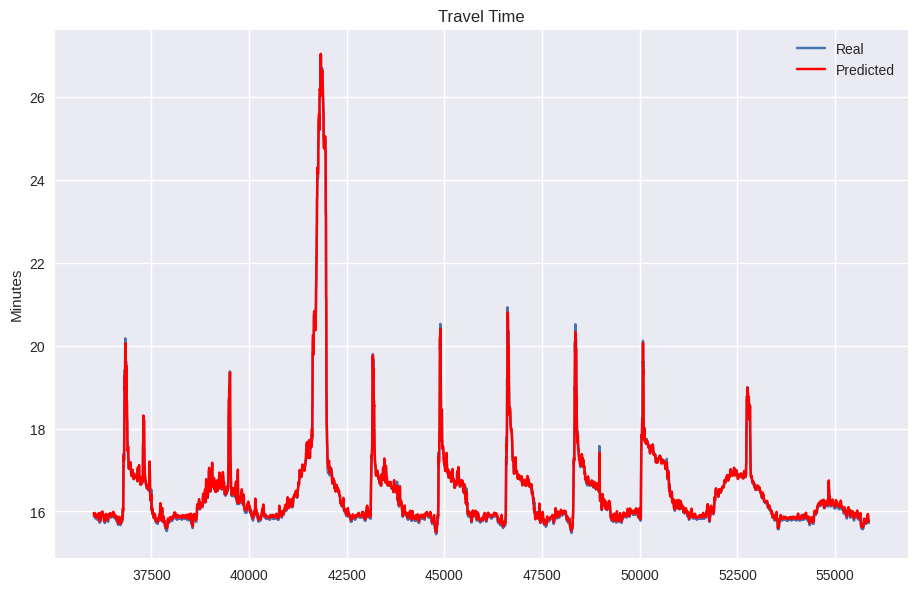

In [ ]:
plt.figure(dpi=100,figsize=(11,7))
infered["travel_time_40"].iloc[num_training:].plot(legend=True)
infered["Predicted"].iloc[num_training:].plot(legend=True, color='r')
plt.legend(['Real','Predicted'])
plt.title('Travel Time')
plt.ylabel("Minutes")
plt.show()